In [ ]:
#common packages we basically always need
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
import os
code_path = "/content/gdrive/MyDrive/CSE512-HW2/"
os.chdir(code_path)

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Oct 18 19:00:09 2017', '__version__': '1.0', '__globals__': [], 'testX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 'testY': array([[7, 2, 1, ..., 4, 5, 6]], dtype=uint8), 'trainY': array([[5, 0, 4, ..., 5, 6, 8]], dtype=uint8), 'trainX': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


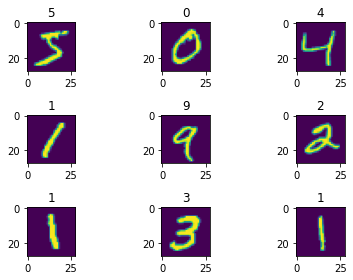

In [ ]:
#load the MNIST dataset with binary pixel values
import scipy.io as sio
data = sio.loadmat('mnist.mat')
print(data)



Xtrain, Xtest = data['trainX'].astype(float), data['testX'].astype(float)
ytrain, ytest = data['trainY'][0], data['testY'][0]

#pull and plot some samples
for k in range(9):
    plot_data = Xtrain[k,:]
    plot_data = np.reshape(plot_data,(28,28))
    plot_label = ytrain[k]
    plt.subplot(3,3,k+1)
    plt.imshow(plot_data)
    plt.title(plot_label)
plt.tight_layout()

def get_small_dataset(X,y,m):
    return X[:m,:],y[:m]


num_labels = len(np.unique(ytrain))
num_feats = Xtrain.shape[1]

In [ ]:

def get_dist(Xtrain,zquery):
    distances = -2*Xtrain@zquery + np.sum(zquery**2) + np.sum(Xtrain**2, axis = 1)
    distances = distances**.5
    return distances
    
print(get_dist(Xtrain,Xtrain[0,:])[0])
print(get_dist(Xtrain,Xtest[0,:])[10])
print(get_dist(Xtrain,Xtest[10,:])[50])




0.0
2463.6278127996525
2379.441951382719


In [ ]:
import scipy.stats as ss

m = 100
K = 3

Xtrain_small, ytrain_small = get_small_dataset(Xtrain,ytrain,m)

def pred(zquery,Xtrain,ytrain, K):
    distances = get_dist(Xtrain, zquery)
    indices = np.argsort(distances)
    distances = np.sort(distances)
    topk = ytrain_small[indices[0:K]]
    return ss.mode(topk)[0]
    
ytest_pred = ytest + 0    
for k in range(Xtest.shape[0]):
    z = Xtest[k,:]
    ytest_pred[k] = pred(z,Xtrain_small, ytrain_small, K)

print(ytest_pred[:20])
print(ytest[:20])

[7 2 1 0 4 1 4 4 6 9 0 0 9 0 1 9 7 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [ ]:
# from sklearn.metrics import accuracy_score
def get_accuracy(ytest, ypred):
    return np.sum(ytest == ypred) / len(ytest)

get_accuracy(ytest,ytest_pred)

0.6794

In [ ]:
import time
for m in [100,1000, 2500]:
    Xtrain_small, ytrain_small = get_small_dataset(Xtrain,ytrain,m)
    for K in [1,3,5]:
        
        start = time.time()
        ytest_pred = ytest + 0    
        for k in range(Xtest.shape[0]):
            z = Xtest[k,:]
            ytest_pred[k] = pred(z,Xtrain_small, ytrain_small, K)
    
        print(m,K,get_accuracy(ytest,ytest_pred), time.time()-start)

100 1 0.6794 9.281357049942017
100 3 0.6476 9.205874681472778
100 5 0.6232 9.351280927658081
1000 1 0.869 54.075950622558594
1000 3 0.8622 48.400837898254395
1000 5 0.8582 47.38647818565369
2500 1 0.9136 126.55778646469116
2500 3 0.9146 126.62799572944641
2500 5 0.9101 125.87638521194458
